In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 시간 정보가 포함된 데이터 살펴보기(시계열 데이터)

In [2]:
# 수집처 : blockchain.com
bitcoin_df = pd.read_csv('data/market-price.csv')
bitcoin_df.head()


,datetime,market-price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [3]:
# 컬럼 이름 변경
bitcoin_df.columns = ['day', 'price']
bitcoin_df.head()


,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [4]:
# 데이터 프레임 정보 확인
bitcoin_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# day 컬럼의 값을 날짜 타입으로 변경한다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [6]:
# 시각화를 위해 날짜를 인덱스로 설정한다.
bitcoin_df.set_index('day', inplace=True)
bitcoin_df


,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


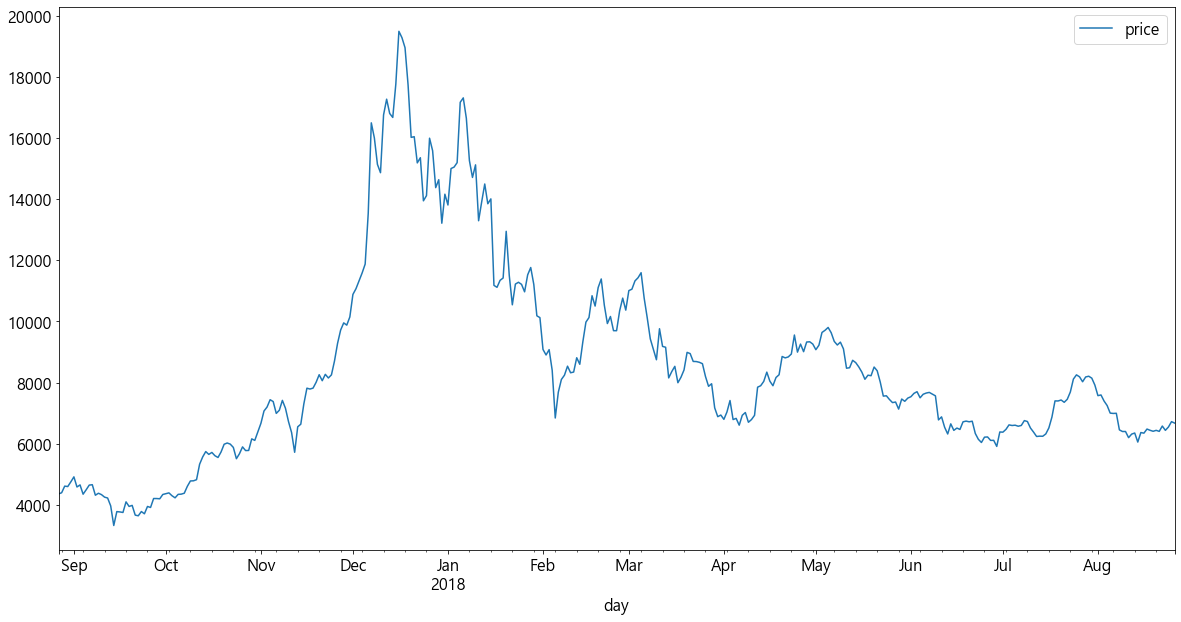

In [7]:
# 선 그래프로 그린다.
# 인덱스가 x 축, 값이 y축이 된다.
bitcoin_df.plot()
plt.show()


- order : 보통 2,1,2 나 1,1,2,  2,1,1 셋중 에하는 줍니다. 2,1,2 로 줬을 때 오류가 발생하지 않으면 그냥 가고 오류가 발생하면 1,1,2 나 2,1,1로 주고 실행. 데이터의 상태에 따라 다름
- trend : c나 nc 둘중에 하나, 학습 계산을 할 때 상수를 포함할 것이냐 아니냐를 의미
- 상수는 arima 모델이 예측 계산을 할 때 사용하는 arima 모델만의보정상수임. 주느냐 안주느냐 따라 보정 여부가 결정 (할지말지는 그때 그때 다름)
- full_output : 모든 결과를 출력해서 보여줄 것인가
- disp : 학습 과정에 나오는 메시지를 출력할 지 여부를 결정

In [8]:
model = ARIMA(bitcoin_df['price'].values, order=(2, 1, 2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Mon, 17 May 2021   AIC                           5587.107
Time:                        09:24:49   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3641     27.794      0.229      0.819     -48.112      60.840
ar.L1.D.y     -0.3789      1.828     -0.207      0.836      -3.962       3.204
ar.L2.D.y      0.1585      1.191      0.133      0.894      -2.177       2.494
ma.L1.D.y      0.4570      1.824      0.251      0.802      -3.117       4.031
ma.L2.D.y     -0.1941      1.338     -0.145      0.885      -2.817       2.429
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5864           +0.0000j            1.5864            0.5000
AR.2            3.9767           +0.0000j            3.9767            0.0000
MA.1           -1.3797           +0.0000j            1.3797            0.5000
MA.2            3.7344           +0.0000j            3.7344            0.0000
-----------------------------------------------------------------------------
"""

### 모델 성능과 예측 결과 시각화

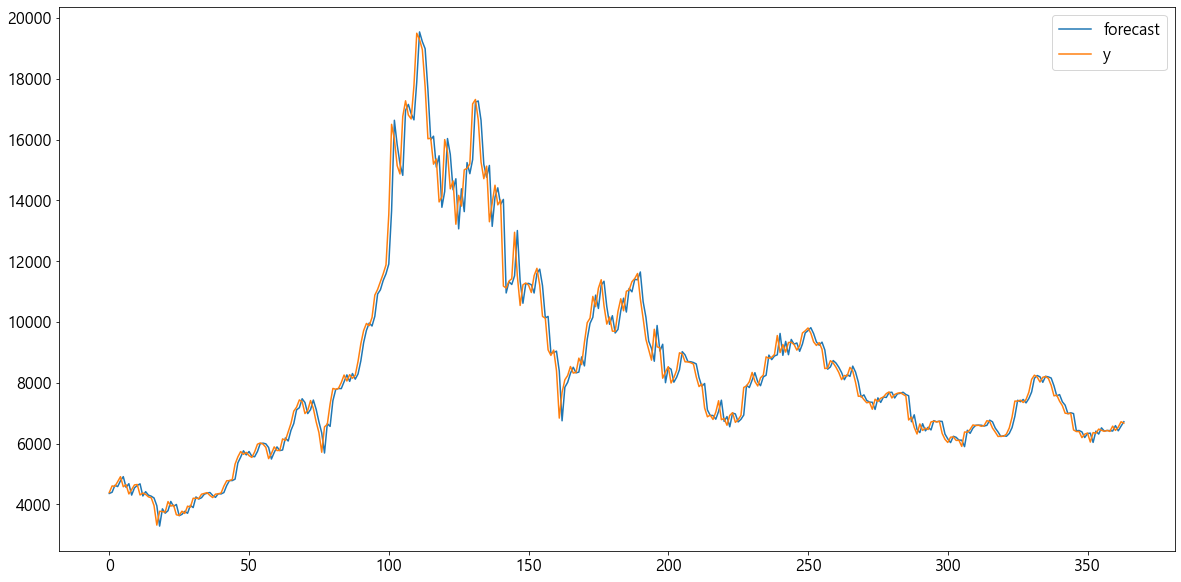

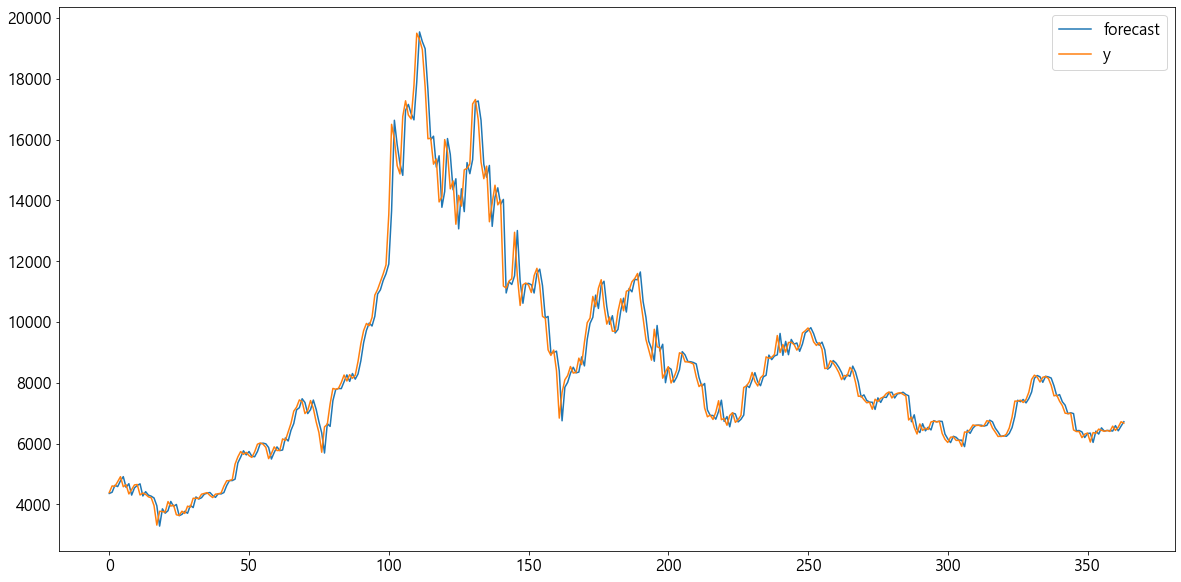

In [11]:
#학습한 데이터의 값을 파란색 예측한 결과의 값을 주황색으로 그래프를 그린다.
model_fit.plot_predict()

### 데이터를 예측한다.

In [12]:
# 향후 5일 후의 값을 예측한다.
forecast_data = model_fit.forecast(steps=5)
forecast_data[0]


array([6676.92783124, 6685.07120087, 6690.33146331, 6697.39578377,
       6703.3195541 ])

In [13]:
# 5일치 수집된 데이터를 불러온다.
bitcoin_test_df = pd.read_csv('data/market-price-test.csv')
bitcoin_test_df.columns = ['day', 'price']
bitcoin_test_df


,day,price
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [14]:
# 예측 결과를 가져온다.
pred_y = forecast_data[0].tolist()
# 진짜 결과를 추출
test_y = bitcoin_test_df['price'].values

print(pred_y)
print(test_y)


[6676.927831239249, 6685.07120086759, 6690.3314633090895, 6697.395783767874, 6703.319554101824]
[6719.26615385 7000.04       7054.27642857 6932.6625     6981.94615385]


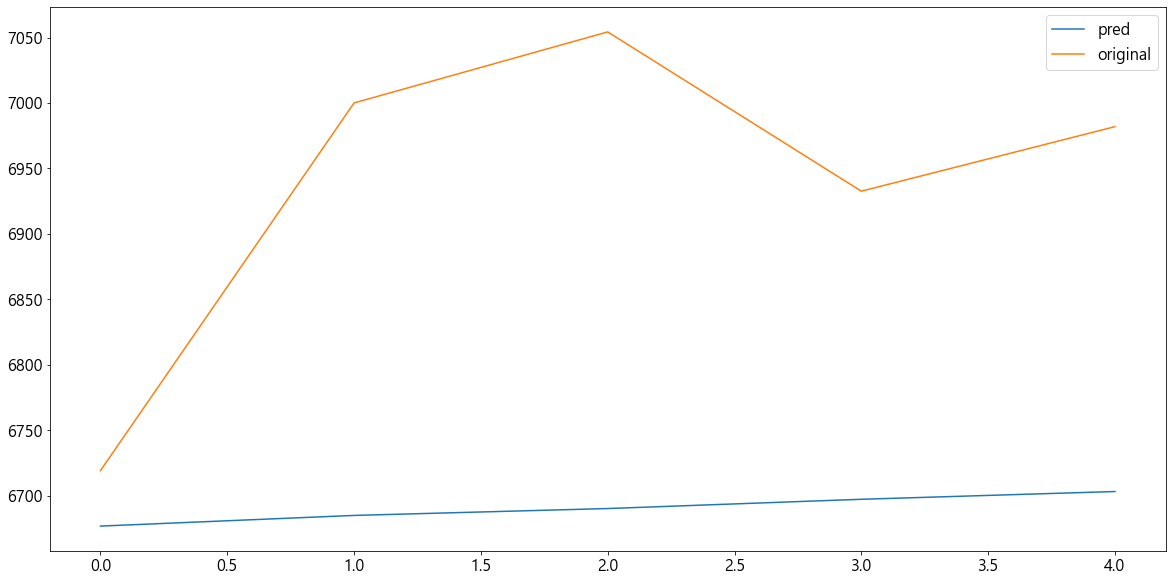

In [15]:
plt.plot(pred_y, label='pred')
plt.plot(test_y, label='original')

plt.legend()
plt.show()


### facebook Prophet 사용

- conda install -c conda-forge fbprophet
- pip uninstall fbprophet
- pip install fbprophet
